In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd
pd.set_option('mode.chained_assignment', None) # Warnin 방지용
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from matplotlib import font_manager, rc

%matplotlib inline
#sns.set(style='whitegrid')
plt.rcParams['figure.figsize']=(12,9)

path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

In [3]:
import folium

In [4]:
commerce = pd.read_csv('data2/dw_commerce.csv', encoding='ansi')
commerce.head()

,district,district_code,town,town_code,convenience_facility,C1_living_facility,C2_living_facility,sales_facility,transportation_facility,business_facilites,accommodation_facility,amusement_facility,DST_facility,automobile_facility,etc
0,강서구,D01,강동동,D0101,0,169,1086,0,1,4,0,0,6,2,16
1,강서구,D01,구랑동,D0102,0,17,19,0,0,0,1,0,2,7,0
2,강서구,D01,녹산동,D0103,0,141,246,0,0,2,0,0,12,0,4
3,강서구,D01,눌차동,D0104,0,10,7,0,0,0,0,0,0,0,10
4,강서구,D01,대저1동,D0105,0,772,1292,3,6,23,0,0,25,7,26


In [5]:
commerce = commerce.rename(columns={'convenience_facility':'생활편익시설',
                                   'C1_living_facility':'제1종근린생활시설',
                                   'C2_living_facility':'제2종근린생활시설',
                                   'sales_facility':'판매시설',
                                   'transportation_facility':'운수시설',
                                   'business_facilites':'업무시설',
                                   'accommodation_facility':'숙박시설',
                                   'amusement_facility':'위락시설',
                                   'DST_facility':'위험물저장및처리시설',
                                   'automobile_facility':'자동차관련시설',
                                   'etc':'기타'})
commerce.head()

,district,district_code,town,town_code,생활편익시설,제1종근린생활시설,제2종근린생활시설,판매시설,운수시설,업무시설,숙박시설,위락시설,위험물저장및처리시설,자동차관련시설,기타
0,강서구,D01,강동동,D0101,0,169,1086,0,1,4,0,0,6,2,16
1,강서구,D01,구랑동,D0102,0,17,19,0,0,0,1,0,2,7,0
2,강서구,D01,녹산동,D0103,0,141,246,0,0,2,0,0,12,0,4
3,강서구,D01,눌차동,D0104,0,10,7,0,0,0,0,0,0,0,10
4,강서구,D01,대저1동,D0105,0,772,1292,3,6,23,0,0,25,7,26


In [6]:
public = pd.read_csv('data2/dw_public_facilites.csv', encoding='ansi')
public.head()

,district,district_code,town,town_code,public_cnt,cultural_facility,religious_establishment,medical_facility,Education and Research Facility,elderly facility,training facility,exercise facility,Cemetery-related facilities,tourist rest facilities,funeral facility,other facilities
0,강서구,D01,강동동,D0101,34,2,5,0,9,12,0,3,0,0,0,3
1,강서구,D01,구랑동,D0102,2,0,1,0,1,0,0,0,0,0,0,0
2,강서구,D01,녹산동,D0103,20,0,9,0,2,6,0,3,0,0,0,0
3,강서구,D01,눌차동,D0104,2,0,1,0,1,0,0,0,0,0,0,0
4,강서구,D01,대저1동,D0105,58,5,10,0,17,16,0,4,1,1,0,4


In [7]:
public = public.rename(columns={'cultural_facility':'문화및집회시설',
                               'religious_establishment':'종교시설',
                               'medical_facility':'의료시설',
                               'Education and Research Facility':'교육연구시설',
                               'elderly facility':'노유자시설',
                               'training facility':'수련시설',
                               'exercise facility':'운동시설',
                               'Cemetery-related facilities':'묘지관련시설',
                               'tourist rest facilities':'관광휴게시설',
                                'funeral facility':'장례시설',
                               'other facilities':'기타시설'})
public.head()

,district,district_code,town,town_code,public_cnt,문화및집회시설,종교시설,의료시설,교육연구시설,노유자시설,수련시설,운동시설,묘지관련시설,관광휴게시설,장례시설,기타시설
0,강서구,D01,강동동,D0101,34,2,5,0,9,12,0,3,0,0,0,3
1,강서구,D01,구랑동,D0102,2,0,1,0,1,0,0,0,0,0,0,0
2,강서구,D01,녹산동,D0103,20,0,9,0,2,6,0,3,0,0,0,0
3,강서구,D01,눌차동,D0104,2,0,1,0,1,0,0,0,0,0,0,0
4,강서구,D01,대저1동,D0105,58,5,10,0,17,16,0,4,1,1,0,4


In [8]:
house = pd.read_csv('data2/dw_house.csv', encoding='ansi')
house = house.drop(columns={'city'})
house.head()

,district,district_code,town,town_code,sum,house,apartment
0,강서구,D01,강동동,D0101,1742,1741,1
1,강서구,D01,구랑동,D0102,57,57,0
2,강서구,D01,녹산동,D0103,428,424,4
3,강서구,D01,눌차동,D0104,401,398,3
4,강서구,D01,대저1동,D0105,1711,1695,16


In [9]:
house = house.rename(columns={'house':'단독주택',
                             'apartment':'공동주택'})

house.head()

,district,district_code,town,town_code,sum,단독주택,공동주택
0,강서구,D01,강동동,D0101,1742,1741,1
1,강서구,D01,구랑동,D0102,57,57,0
2,강서구,D01,녹산동,D0103,428,424,4
3,강서구,D01,눌차동,D0104,401,398,3
4,강서구,D01,대저1동,D0105,1711,1695,16


In [10]:
commerce

,district,district_code,town,town_code,생활편익시설,제1종근린생활시설,제2종근린생활시설,판매시설,운수시설,업무시설,숙박시설,위락시설,위험물저장및처리시설,자동차관련시설,기타
0,강서구,D01,강동동,D0101,0,169,1086,0,1,4,0,0,6,2,16
1,강서구,D01,구랑동,D0102,0,17,19,0,0,0,1,0,2,7,0
2,강서구,D01,녹산동,D0103,0,141,246,0,0,2,0,0,12,0,4
3,강서구,D01,눌차동,D0104,0,10,7,0,0,0,0,0,0,0,10
4,강서구,D01,대저1동,D0105,0,772,1292,3,6,23,0,0,25,7,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,해운대구,D16,송정동,D0115,0,116,245,0,3,5,83,1,22,18,0
188,해운대구,D16,우동,D1605,6,229,284,21,6,48,120,7,10,17,1
189,해운대구,D16,재송동,D1606,2,309,364,8,3,29,39,0,8,23,0
190,해운대구,D16,좌동,D1607,46,97,106,3,2,30,0,3,6,29,1


In [11]:
public

,district,district_code,town,town_code,public_cnt,문화및집회시설,종교시설,의료시설,교육연구시설,노유자시설,수련시설,운동시설,묘지관련시설,관광휴게시설,장례시설,기타시설
0,강서구,D01,강동동,D0101,34,2,5,0,9,12,0,3,0,0,0,3
1,강서구,D01,구랑동,D0102,2,0,1,0,1,0,0,0,0,0,0,0
2,강서구,D01,녹산동,D0103,20,0,9,0,2,6,0,3,0,0,0,0
3,강서구,D01,눌차동,D0104,2,0,1,0,1,0,0,0,0,0,0,0
4,강서구,D01,대저1동,D0105,58,5,10,0,17,16,0,4,1,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,해운대구,D16,송정동,D0115,24,1,6,0,12,3,0,1,0,1,0,0
188,해운대구,D16,우동,D1605,209,11,60,15,83,24,2,8,0,5,0,1
189,해운대구,D16,재송동,D1606,103,2,22,6,36,31,1,4,0,1,0,0
190,해운대구,D16,좌동,D1607,94,2,14,4,63,6,0,5,0,0,0,0


In [12]:
house

,district,district_code,town,town_code,sum,단독주택,공동주택
0,강서구,D01,강동동,D0101,1742,1741,1
1,강서구,D01,구랑동,D0102,57,57,0
2,강서구,D01,녹산동,D0103,428,424,4
3,강서구,D01,눌차동,D0104,401,398,3
4,강서구,D01,대저1동,D0105,1711,1695,16
...,...,...,...,...,...,...,...
187,해운대구,D16,송정동,D0115,644,505,139
188,해운대구,D16,우동,D1605,1987,1699,288
189,해운대구,D16,재송동,D1606,1896,1374,522
190,해운대구,D16,좌동,D1607,308,158,150


In [13]:
merge_in = pd.merge(commerce, public)
merge_in

,district,district_code,town,town_code,생활편익시설,제1종근린생활시설,제2종근린생활시설,판매시설,운수시설,업무시설,...,종교시설,의료시설,교육연구시설,노유자시설,수련시설,운동시설,묘지관련시설,관광휴게시설,장례시설,기타시설
0,강서구,D01,강동동,D0101,0,169,1086,0,1,4,...,5,0,9,12,0,3,0,0,0,3
1,강서구,D01,구랑동,D0102,0,17,19,0,0,0,...,1,0,1,0,0,0,0,0,0,0
2,강서구,D01,녹산동,D0103,0,141,246,0,0,2,...,9,0,2,6,0,3,0,0,0,0
3,강서구,D01,눌차동,D0104,0,10,7,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4,강서구,D01,대저1동,D0105,0,772,1292,3,6,23,...,10,0,17,16,0,4,1,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,해운대구,D16,송정동,D0115,0,116,245,0,3,5,...,6,0,12,3,0,1,0,1,0,0
188,해운대구,D16,우동,D1605,6,229,284,21,6,48,...,60,15,83,24,2,8,0,5,0,1
189,해운대구,D16,재송동,D1606,2,309,364,8,3,29,...,22,6,36,31,1,4,0,1,0,0
190,해운대구,D16,좌동,D1607,46,97,106,3,2,30,...,14,4,63,6,0,5,0,0,0,0


In [14]:
house

,district,district_code,town,town_code,sum,단독주택,공동주택
0,강서구,D01,강동동,D0101,1742,1741,1
1,강서구,D01,구랑동,D0102,57,57,0
2,강서구,D01,녹산동,D0103,428,424,4
3,강서구,D01,눌차동,D0104,401,398,3
4,강서구,D01,대저1동,D0105,1711,1695,16
...,...,...,...,...,...,...,...
187,해운대구,D16,송정동,D0115,644,505,139
188,해운대구,D16,우동,D1605,1987,1699,288
189,해운대구,D16,재송동,D1606,1896,1374,522
190,해운대구,D16,좌동,D1607,308,158,150


In [18]:
house = house.drop(columns={'district','district_code'})

merge_inner = pd.concat([merge_in, house], axis=1, join='inner')
#merge_inner = merge_inner.to_csv('data2/merge_inner.csv', encoding='ansi')
merge_inner

,district,district_code,town,town_code,생활편익시설,제1종근린생활시설,제2종근린생활시설,판매시설,운수시설,업무시설,...,운동시설,묘지관련시설,관광휴게시설,장례시설,기타시설,town,town_code,sum,단독주택,공동주택
0,강서구,D01,강동동,D0101,0,169,1086,0,1,4,...,3,0,0,0,3,강동동,D0101,1742,1741,1
1,강서구,D01,구랑동,D0102,0,17,19,0,0,0,...,0,0,0,0,0,구랑동,D0102,57,57,0
2,강서구,D01,녹산동,D0103,0,141,246,0,0,2,...,3,0,0,0,0,녹산동,D0103,428,424,4
3,강서구,D01,눌차동,D0104,0,10,7,0,0,0,...,0,0,0,0,0,눌차동,D0104,401,398,3
4,강서구,D01,대저1동,D0105,0,772,1292,3,6,23,...,4,1,1,0,4,대저1동,D0105,1711,1695,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,해운대구,D16,송정동,D0115,0,116,245,0,3,5,...,1,0,1,0,0,송정동,D0115,644,505,139
188,해운대구,D16,우동,D1605,6,229,284,21,6,48,...,8,0,5,0,1,우동,D1605,1987,1699,288
189,해운대구,D16,재송동,D1606,2,309,364,8,3,29,...,4,0,1,0,0,재송동,D1606,1896,1374,522
190,해운대구,D16,좌동,D1607,46,97,106,3,2,30,...,5,0,0,0,0,좌동,D1607,308,158,150


In [19]:
commerce[commerce.district == '강서구']['제1종근린생활시설'].sum()

2047

   district_판매시설  판매시설
0            강서구   216
1            금정구    27
2            기장군    51
3             남구    45
4             동구    12
5            동래구    66
6           부산진구    83
7             북구    14
8            사상구   115
9            사하구    48
10            서구    32
11           수영구    32
12           연제구    29
13           영도구    47
14            중구    33
15          해운대구    79


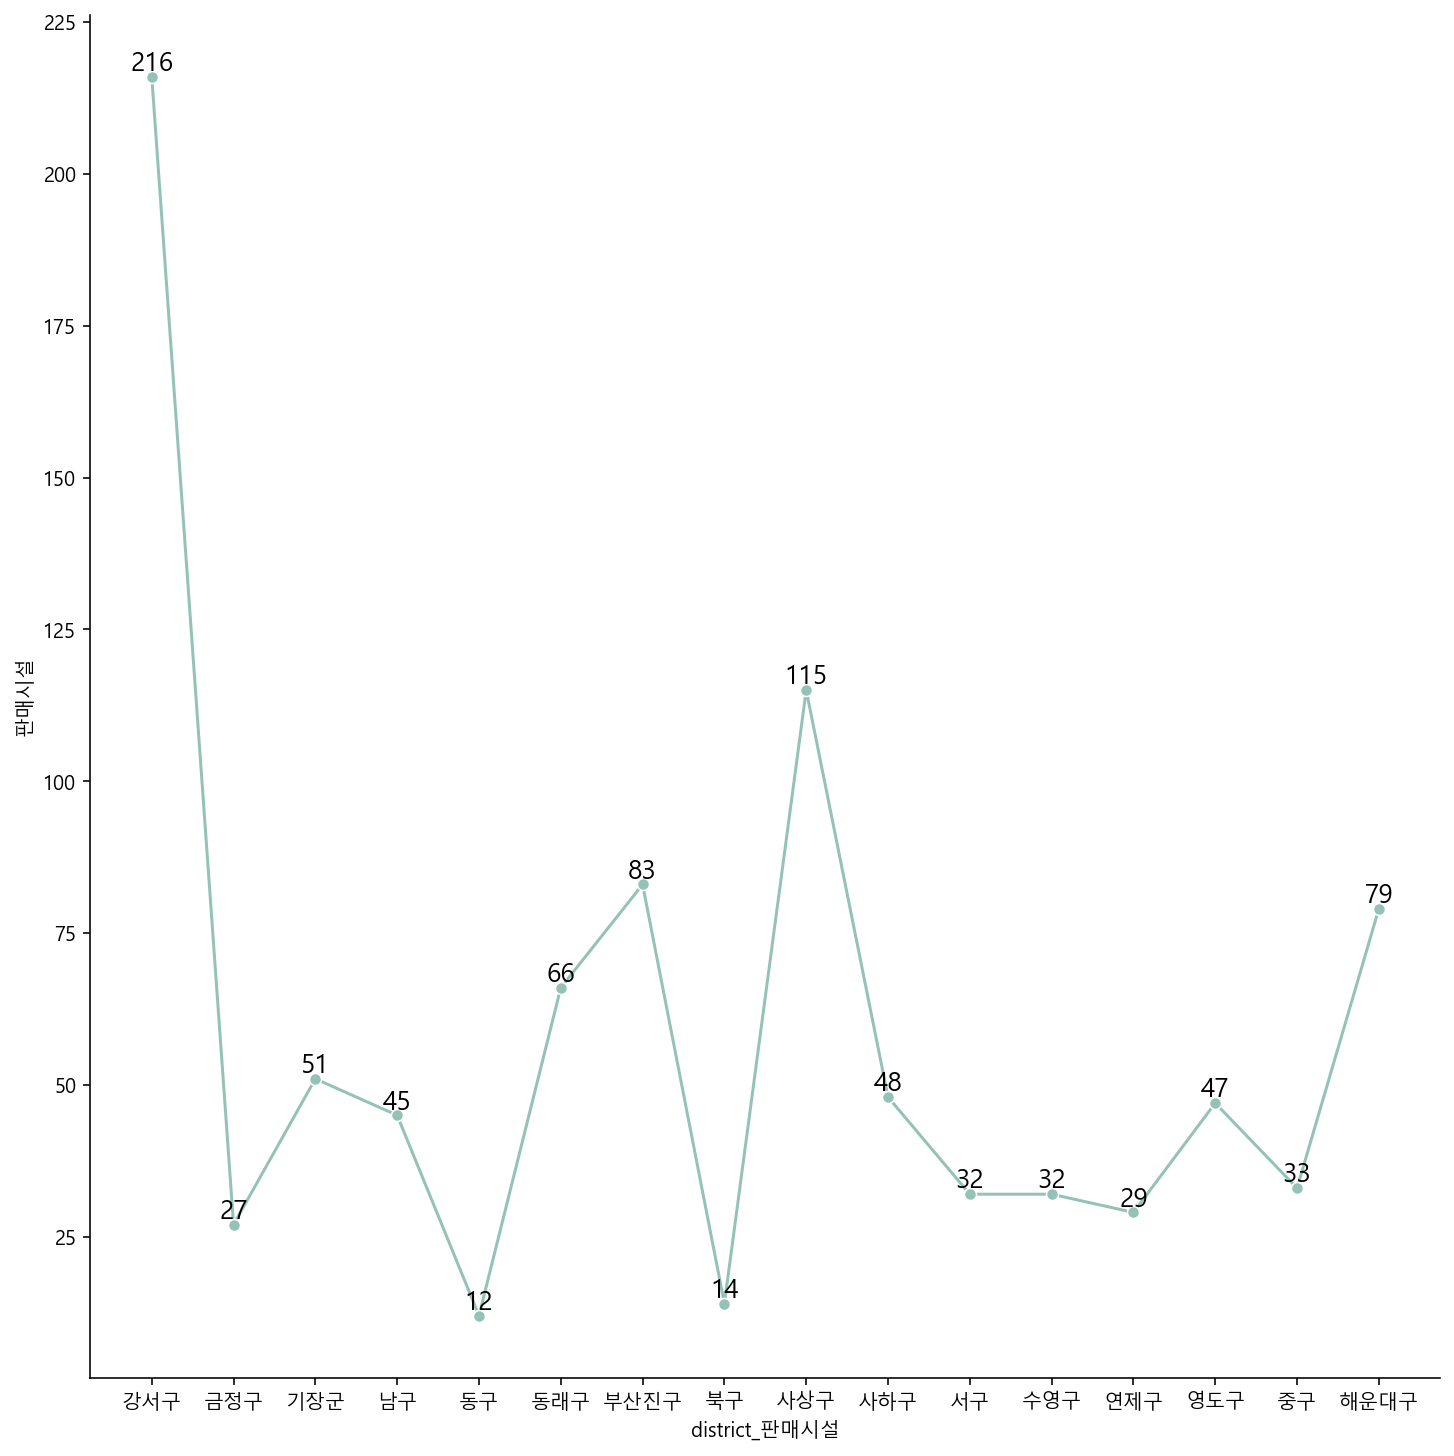

In [20]:
district = [] # 구
district_code = [] # 구 코드
for c in commerce['district']:
    if c not in district:
        district.append(c)
for d in commerce['district_code']:
    if d not in district_code:
        district_code.append(d)
    
# 특정시설 있는 지역과 특정시설 갯수를 구함.
def place_district(place):
    place_district_sum = []
    for i in range(len(district)):
        cs = merge_inner[merge_inner.district == district[i]][place].sum()
        place_district_sum.append(cs)
        
    pcs = pd.DataFrame({
        'district_%s'%(place):district,
        '%s'%(place):place_district_sum
    })
    print(pcs)
    sns.relplot(x='district_%s'%(place), y='%s'%(place), data=pcs, kind='line', height=10, color='#95C2B7', marker='o')
    for i, v in enumerate(pcs['district_%s'%(place)]):
        plt.text(v, pcs['%s'%(place)][i], str(pcs['%s'%(place)][i]),
                fontsize=13,
                color='black',
                horizontalalignment='center',
                verticalalignment='bottom')
    plt.show()

place_district('판매시설')

In [21]:
import folium
import json

In [22]:
geo_path = "./busan_gu.json"
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [23]:
# 지역별 특정시설 분포 맵 시각화
def place_district_sum_map(place):
    
    place_district_sum = []
    for i in range(len(district)):
        cs = commerce[commerce.district == district[i]][place].sum()
        place_district_sum.append(cs)
        
    pds_fd = pd.DataFrame({
        'district':district,
        'pds':place_district_sum
    })
    
    pds_fd.to_csv('map/%s_pds_fd.csv'%(place))
    
    df = pd.read_csv('map/%s_pds_fd.csv'%(place), index_col=1)
    
    map = folium.Map(location = [35.1856505, 129.1], zoom_start=11)
    map.choropleth(geo_data = geo_str,
              data = df['pds'],
              columns = [df.index, df['pds']],
              fill_color = 'PuRd',
              key_on='feature.id',
                  legend_name='%s 분포'%(place))
    map.save('map/%s_district.html'%(place))
    
    print(pds_fd)

In [24]:
place_district_sum_map('판매시설')

   district  pds
0       강서구  216
1       금정구   27
2       기장군   51
3        남구   45
4        동구   12
5       동래구   66
6      부산진구   83
7        북구   14
8       사상구  115
9       사하구   48
10       서구   32
11      수영구   32
12      연제구   29
13      영도구   47
14       중구   33
15     해운대구   79
